In [1]:
import numpy as np
from itertools import product
from matplotlib.animation import ArtistAnimation
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
class GameOfLife:
    
    def __init__(self, filepath):
        
        self.grid = np.loadtxt(filepath, dtype=int, converters=float)  
            
    def getNeighbors(self, row, col):
        
        M, L = self.grid.shape

        row_offsets = [-1, 0, 1]
        col_offsets = [-1, 0, 1]
        neighbors = {((row+r)%M, (col+c)%L) for r, c in product(row_offsets, col_offsets)}
        neighbors.discard((row, col))

        return list(neighbors)
    
    def getAliveNeighbors(self, row, col):
        
        neighbors = self.getNeighbors(row, col)
        alive = [n for n in neighbors if self.grid[n[0], n[1]] == 1]
        
        return len(alive)
    
    def game(self, timesteps):
        
        self.gameGrids = np.copy(self.grid)
        M = self.grid.shape[0]
        
        for _ in range(timesteps):
            
            grid = self.grid
            alive = np.where(grid == 1)
            dead = np.where(grid == 0)
            alive_neighbors = np.array([self.getAliveNeighbors(n[0], n[1]) for n in zip(*alive)])
            dead_neighbors = np.array([self.getAliveNeighbors(n[0], n[1]) for n in zip(*dead)])
            to_kill = np.where((alive_neighbors < 2) | (alive_neighbors > 3))
            to_revive = np.where(dead_neighbors == 3)
            grid[alive[0][to_kill], alive[1][to_kill]] = 0
            grid[dead[0][to_revive], dead[1][to_revive]] = 1
            self.gameGrids = np.vstack((self.gameGrids, grid))
            self.grid = grid
            
        self.gameGrids = [self.gameGrids[i*M:(i+1)*M, :] for i in range(timesteps)]   

    def makeAnim(self, timesteps, filepath):

        self.game(timesteps)
        frames = self.gameGrids 

        fig, ax = plt.subplots()

        artists = []

        for frame in frames:
            heatmap = ax.imshow(frame, cmap='binary', interpolation='nearest')
            artists.append([heatmap])

        ani = ArtistAnimation(fig, artists, interval=300, blit=True) 
        ani.save(filepath, writer='pillow')

#### Animations

In [ ]:
grid1 = np.random.randint(low=0, high=2, size=(50, 50), dtype=int)
np.savetxt('grids/grid1.txt', grid1)

In [24]:
gol1 = GameOfLife('grids/grid1.txt')

In [25]:
%%capture
gol1.makeAnim(500, 'gifs/gif1.gif')

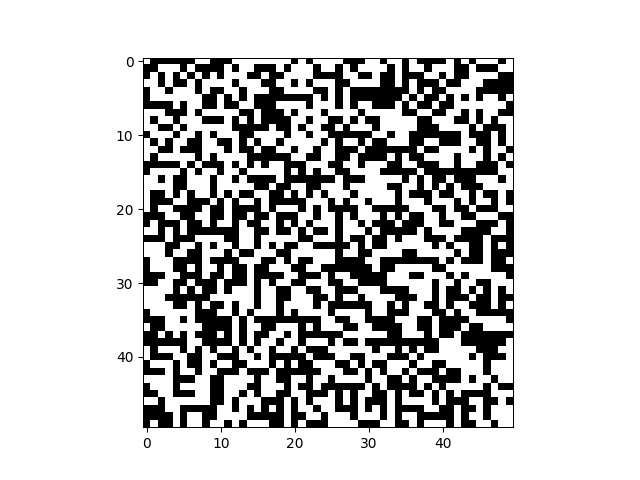

In [26]:
Image(filename='gifs/gif1.gif')

In [3]:
gol2 = GameOfLife('grids/grid2.txt')

In [4]:
%%capture
gol2.makeAnim(10, 'gifs/gif2.gif')

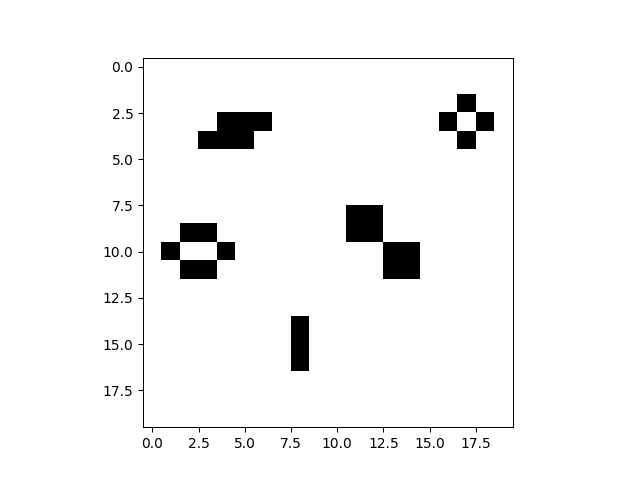

In [5]:
Image(filename='gifs/gif2.gif')

In [43]:
gol3 = GameOfLife('grids/grid3.txt')

In [44]:
%%capture
gol3.makeAnim(10, 'gifs/gif3.gif')

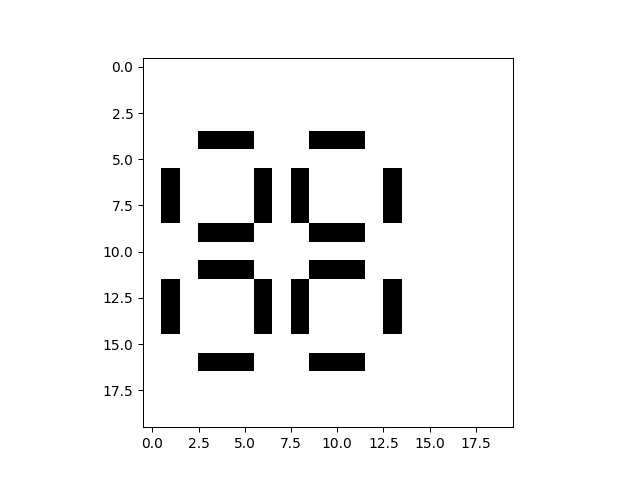

In [45]:
Image(filename='gifs/gif3.gif')

In [41]:
gol4 = GameOfLife('grids/grid4.txt')

In [42]:
%%capture
gol4.makeAnim(50, 'gifs/gif4.gif')

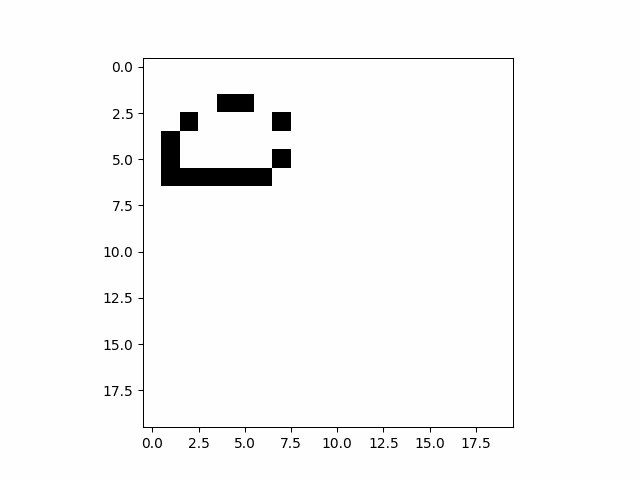

In [43]:
Image(filename='gifs/gif4.gif')